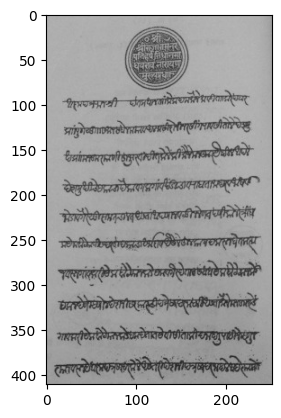

In [480]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread("../archive/historical-doc.png", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
if img is None:
    sys.exit("Could not read the image.")
plt.imshow(img_rgb.squeeze())

In [481]:
print(img.shape)#dimensions
print(img.size)
print(img.dtype)

min_r, max_r = 256,0
min_g, max_g = 256,0
min_b, max_b = 256,0

rows, cols, _ = img.shape
for i in range(rows):
    for j in range(cols):
        k = img[i,j]
        if k[0] < min_r:
            min_r = k[0]
        if k[1] < min_g:
            min_g = k[1]
        if k[2] < min_b:
            min_b = k[2]
        if k[0] > max_r:
            max_r = k[0]
        if k[1] > max_g:
            max_g = k[1]
        if k[2] > max_b:
            max_b = k[2]
        
print(min_r,max_r)   
print(min_g,max_g)  
print(min_b,max_b)  

(411, 251, 3)
309483
uint8
28 190
28 190
28 190


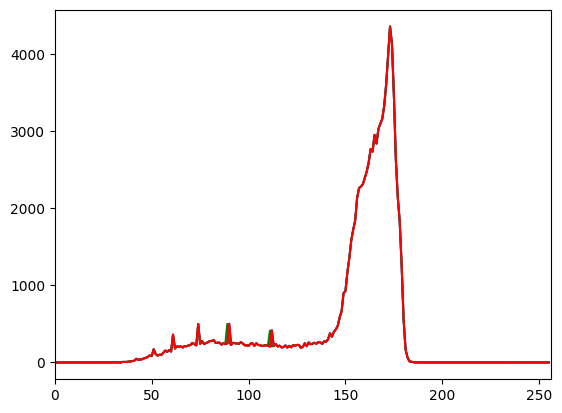

In [482]:
from matplotlib import pyplot as plt

hist_r = cv.calcHist([img],[0],None,[256],[0,256])
hist_g = cv.calcHist([img],[1],None,[256],[0,256])
hist_b = cv.calcHist([img],[2],None,[256],[0,256])

plt.plot(hist_b, color = 'b')
plt.plot(hist_g, color = 'g')
plt.plot(hist_r, color = 'r')
plt.xlim([0,256])
plt.show()

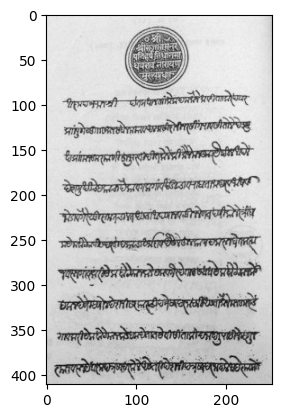

In [483]:
img = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
plt.imshow(img.squeeze(), cmap='gray')

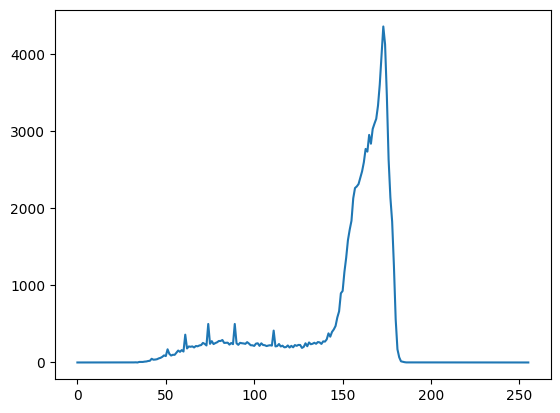

In [484]:

hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [485]:
# img = cv.resize(img, None, fx=1.2, fy=1.2, interpolation=cv.INTER_CUBIC)
# img_rgb = cv.resize(img_rgb, None, fx=1.2, fy=1.2, interpolation=cv.INTER_CUBIC)
# plt.imshow(img.squeeze(), cmap='gray')

print(img.shape)#dimensions
print(img.size)
print(img.dtype)


(411, 251)
103161
uint8


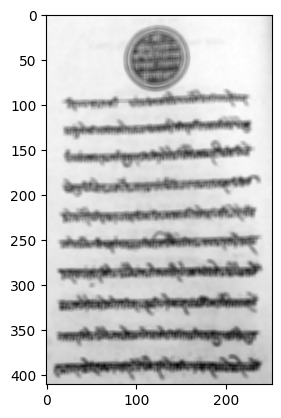

In [486]:

img = cv.blur(img,(5,5))
plt.imshow(img.squeeze(), cmap='gray')


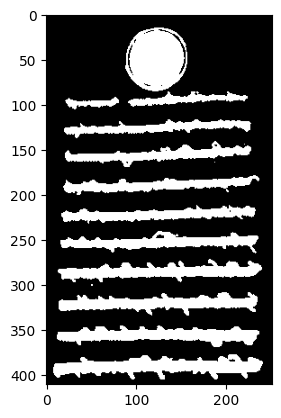

In [487]:
img = cv.threshold(img, 125, 255,
	cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

plt.imshow(img.squeeze(), cmap='gray')


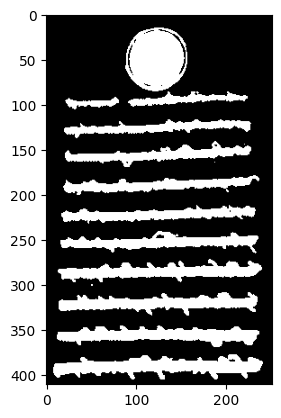

In [488]:

kernel = np.ones((1, 1), np.uint8)
img = cv.dilate(img, kernel, iterations=2)
plt.imshow(img.squeeze(), cmap='gray')

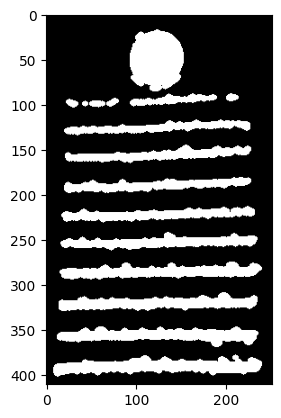

In [489]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.imshow(img.squeeze(), cmap='gray')

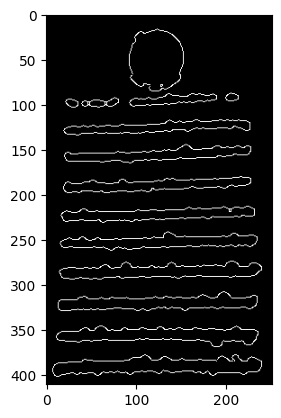

In [490]:
edges = cv.Canny(img,100,200)
plt.imshow(edges.squeeze(), cmap='gray')


 - The use of blurring with a kernel size of (5,5) helps to reduce high-frequency noise in the imageThis step enhances the ability to distinguish the relevant features of the image, making text line detection more reliable.

- Thresholding is applied to segment the image into binary regions. The **THRESH_BINARY_INV** flag inverts the image, The binary inversion and Otsu thresholding create a clean black-and-white image with a clear distinction between the text and the background, facilitating more accurate text line detection in later steps.


- The dilation operation expands the white regions of the binary image (foreground). By using a (1, 1) kernel and applying the dilation twice, it helps connect disjointed parts of characters. This step enhances the continuity of text lines, making them more coherent and easier to detect as continuous structures, especially if the text was thin or broken.

- The opening operation removes small objects or noise in the image by eroding the white areas and then dilating them again.This step ensures that the text lines are more prominent by eliminating small irrelevant features and maintaining the integrity of larger text structures. It can help improve the accuracy of text detection.

- Canny edge detection is applied to identify the boundaries of objects (edges) in the image. The thresholds of 100 and 200 help detect strong and significant edges, which are essential for delineating text lines. dge detection makes the contours of the text lines more visible, assisting in locating and isolating text regions. It also enhances the robustness of subsequent text line detection algorithms by providing clear edges of the text structures.

---

- The **thresholding** and **dilation** steps ensure that the text regions are solid and continuous, making them more detectable in subsequent analysis.
- The **morphological opening** removes irrelevant small artifacts, preventing false detections.
- The **edge detection** prepares the image by highlighting the important text boundaries.



[(7, 378, 233, 25), (11, 346, 225, 24), (11, 346, 225, 24), (13, 308, 222, 22), (13, 308, 222, 22), (14, 274, 226, 21), (14, 274, 226, 21), (15, 241, 220, 22), (15, 241, 220, 22), (16, 213, 216, 19), (16, 213, 216, 19), (19, 180, 209, 19), (19, 180, 209, 19), (20, 144, 208, 22), (20, 144, 208, 22), (19, 117, 208, 18), (19, 117, 208, 18), (39, 92, 42, 12), (92, 88, 98, 15), (92, 88, 98, 15), (92, 16, 61, 70)]


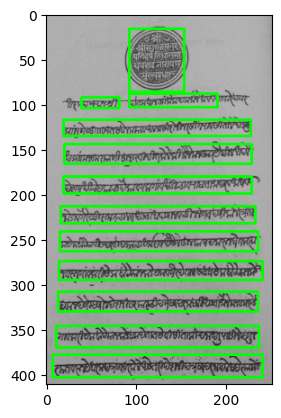

In [491]:
contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

bounding_boxes = []

    
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    if w > 25:  
        bounding_boxes.append((x, y, w, h))
        
        line_image = edges[y:y+h, x:x+w]
        cv.imwrite(f'line_{len(bounding_boxes)}.png', line_image)

for (x, y, w, h) in bounding_boxes:
    cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

print(bounding_boxes)
plt.imshow(img_rgb.squeeze())

The algorithm performs well with clean, well-separated text and clear edges. It detects and visualizes text lines effectively in many standard scenarios.
Limitations: It might struggle with thin, fragmented, or overlapping text. It could also produce false positives due to noise or artifacts. n a densely packed block of text, bounding boxes may overlap or be drawn too large, grouping multiple lines into one, leading to inaccurate text line detection.

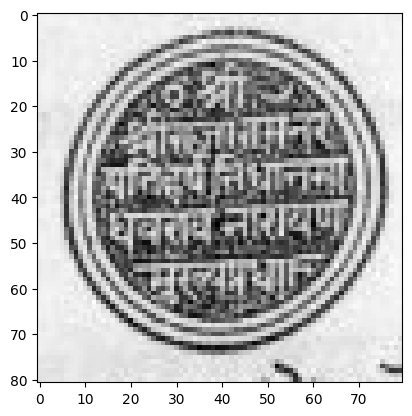

In [492]:
img_c = cv.imread("/home/walke/college/cv/ass1/q3/circle_1.png", cv.IMREAD_COLOR)
if img_c is None:
    sys.exit("Could not read the image.")

img_c_rgb = cv.cvtColor(img_c, cv.COLOR_BGR2RGB)
img_c= cv.cvtColor(img_c_rgb, cv.COLOR_RGB2GRAY)


plt.imshow(img_c.squeeze(), cmap='gray')

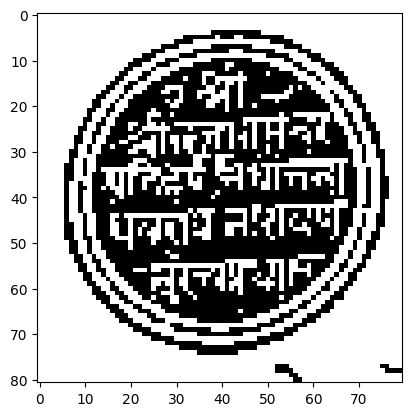

In [493]:

img_c = cv.threshold(img_c, 125, 255,
	cv.THRESH_BINARY| cv.THRESH_OTSU)[1]

kernel = np.ones((1, 1), np.uint8)
img_c = cv.morphologyEx(img_c, cv.MORPH_CLOSE, kernel)
# img_c = cv.dilate(img_c,kernel,iterations = 1)

plt.imshow(img_c.squeeze(), cmap='gray')

[[[36.5 37.5 31.6]]]


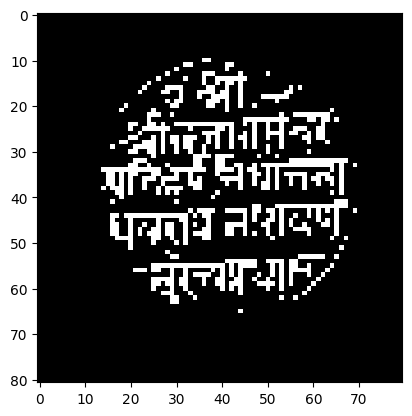

In [494]:

circles = cv.HoughCircles(img_c, cv.HOUGH_GRADIENT, dp=1, minDist=30,
                               param1=50, param2=30, minRadius=30, maxRadius=50)

print(circles)
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv.circle(img_c, (i[0]+5, i[1]), i[2]-2, (0, 255, 0), 2)

            mask = np.zeros(img_c.shape, dtype=np.uint8)
            cv.circle(mask, (i[0]+5, i[1]), i[2]-2 , (255), thickness=-1)

           
            masked_img = cv.bitwise_and(img_c, img_c, mask=mask)

plt.imshow(masked_img, cmap='gray')    



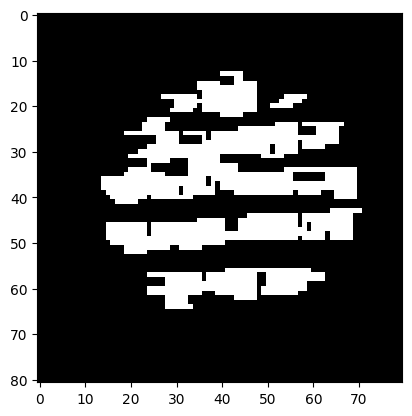

In [495]:

# kernel = np.ones((1, 2), np.uint8)
# masked_img = cv.morphologyEx(masked_img, cv.MORPH_OPEN, kernel)

# kernel = np.ones((1, 1), np.uint8)
# masked_img =  cv.erode(masked_img,kernel,iterations = 1)

# kernel = np.ones((2, 4), np.uint8)
# masked_img = cv.dilate(masked_img,kernel,iterations = 1)

kernel = np.ones((2, 1), np.uint8)
masked_img = cv.morphologyEx(masked_img, cv.MORPH_OPEN, kernel)

kernel = np.ones((1, 4), np.uint8)
masked_img = cv.dilate(masked_img,kernel,iterations = 1)

kernel = np.ones((1, 3), np.uint8)
masked_img =  cv.erode(masked_img,kernel,iterations = 1)

kernel = np.ones((1, 4), np.uint8)
masked_img = cv.dilate(masked_img,kernel,iterations = 1)

kernel = np.ones((2, 1), np.uint8)
masked_img =  cv.erode(masked_img,kernel,iterations = 1)


# masked_img = cv.Canny(masked_img,100,200)

plt.imshow(masked_img, cmap='gray') 



- circular shape can overlap with text, complicating segmentation. Circle detection may mistakenly detect parts of the document or distort text areas.

- Cropping closer helps isolate the seal but risks excluding text near the seal.

- Operations like dilation and erosion can distort text lines if parameters are not properly set.

- Seal designs may blend with text, causing segmentation issues.


[(24, 56, 39, 9), (15, 43, 56, 10), (14, 23, 56, 19), (27, 13, 21, 10)]


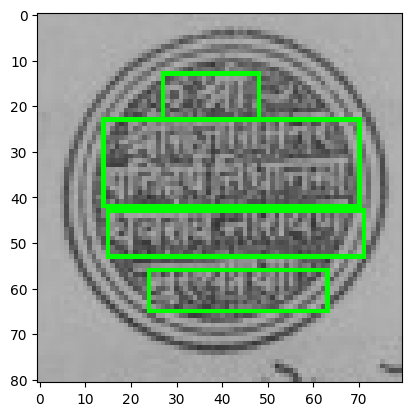

In [ ]:


contours, _ = cv.findContours(masked_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

bounding_boxes = []

    
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    if h > 7:  
        bounding_boxes.append((x, y, w, h))
        
        line_image = edges[y:y+h, x:x+w]
        cv.imwrite(f'cirle_line_{len(bounding_boxes)}.png', line_image)

for (x, y, w, h) in bounding_boxes:
    cv.rectangle(img_c_rgb, (x, y), (x + w, y + h), (0, 255, 0), 1)

print(bounding_boxes)
plt.imshow(img_c_rgb.squeeze())

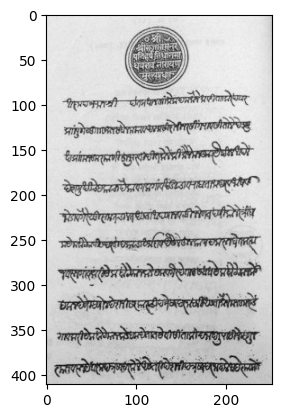

In [497]:
img_p = cv.imread("/home/walke/college/cv/ass1/archive/historical-doc.png", cv.IMREAD_COLOR)
if img_p is None:
    sys.exit("Could not read the image.")

img_p_rgb = cv.cvtColor(img_p, cv.COLOR_BGR2RGB)
img_p= cv.cvtColor(img_p_rgb, cv.COLOR_RGB2GRAY)


plt.imshow(img_p.squeeze(), cmap='gray')

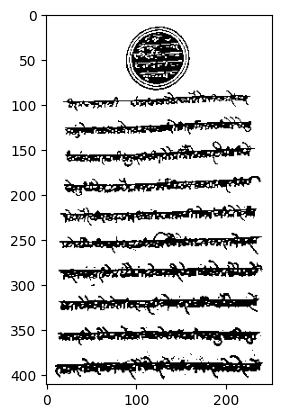

In [498]:


kernel = np.ones((1, 2), np.uint8)
img_p = cv.morphologyEx(img_p, cv.MORPH_OPEN, kernel)

img_p = cv.threshold(img_p, 125, 255,
	cv.THRESH_BINARY| cv.THRESH_OTSU)[1]

kernel = np.ones((1, 1), np.uint8)
img_p = cv.morphologyEx(img_p, cv.MORPH_CLOSE, kernel)


plt.imshow(img_p.squeeze(), cmap='gray')

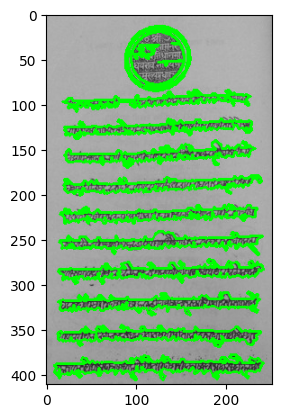

In [499]:
contours, _ = cv.findContours(img_p, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

polygonal_boundaries = []

    
for cnt in contours:
    epsilon = 0.001 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)
    if len(approx) >= 20:  
            polygonal_boundaries.append(approx)
            cv.polylines(img_p_rgb, [approx], isClosed=True, color=(0, 255, 0), thickness=2)



plt.imshow(img_p_rgb.squeeze())

Using polygons allows for more precise segmentation with less preprocessing, especially in cases with irregular shapes or curved text. However, it may require careful tuning of the epsilon parameter to ensure the polygons closely match the contours without causing distortion or loss of detail.

- Polygons can more accurately follow the contour of irregular or curved text lines or shapes compared to rectangular bounding boxes, especially when dealing with non-rectangular or angled text.
- Polygons can be computationally more complex to handle, especially when approximating curves or irregular shapes.
- Using polygons in your method requires less preprocessing (compared to bounding boxes), as it directly adapts to the contours of the text or objects without the need for specific width or height criteria.